# State of Data Brazil

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('data/State_of_Data_2021.csv')

print(f'Quantidade de respostas: {df.shape[0]}')

Quantidade de respostas: 2645


### Blocos de perguntas interessantes:
1. Dados demográficos
2. Dados sobre carreira
4. Conhecimentos sobre dados
5. Objetivos com dados
6. Conhecimento de engenharia de dados
7. Análise de dados
8. Ciência de dados

In [2]:
cols = ["('P1_a ', 'Idade')",
        "('P1_a_a ', 'Faixa idade')",
        "('P1_b ', 'Genero')",
        "('P1_e ', 'Estado onde mora')",
        "('P1_e_b ', 'Regiao onde mora')",
        "('P1_g_b ', 'Regiao de origem')",
        "('P1_g_c ', 'Mudou de Estado?')",
        "('P1_i ', 'Área de Formação')",
        "('P2_a ', 'Qual sua situação atual de trabalho?')",
        "('P2_b ', 'Setor')",
        "('P2_f ', 'Cargo Atual')",
        "('P2_g ', 'Nivel')",
        "('P2_h ', 'Faixa salarial')",
        "('P2_q ', 'Atualmente qual a sua forma de trabalho?')",
        "('P2_o ', 'Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?')",
        ###### Quais dos dados abaixo mais utilizadas no trabalho
        "('P4_c_a ', 'Dados relacionais (estruturados em bancos SQL)')",
        "('P4_c_b ', 'Dados armazenados em bancos NoSQL')",
        "('P4_c_c ', 'Imagens')",
        "('P4_c_d ', 'Textos/Documentos')",
        "('P4_c_e ', 'Vídeos')",
        "('P4_c_f ', 'Áudios')",
        "('P4_c_g ', 'Planilhas')",
        ###### Linguagens mais utilizadas
        "('P4_e_a ', 'SQL')",
        "('P4_e_b ', 'R ')",
        "('P4_e_c ', 'Python')",
        "('P4_e_d ', 'C/C++/C#')",
        "('P4_e_e ', '.NET')",
        "('P4_e_f ', 'Java')",
        "('P4_e_g ', 'Julia')",
        "('P4_e_h ', 'SAS/Stata')",
        "('P4_e_i ', 'Visual Basic/VBA')",
        "('P4_e_j ', 'Scala')",
        "('P4_e_k ', 'Matlab')",
        "('P4_e_l ', 'PHP')",
        "('P4_e_m ', 'Javascript')",
        "('P4_e_n ', 'Não utilizo nenhuma linguagem')"
]

depara = [
    'Idade',
    'fx_idade',
    'genero',
    'estado',
    'regiao_moradia',
    'regiao_origem',
    'se_mudou',
    'formacao',
    'situacao_atual',
    'setor',
    'cargo',
    'senioridade',
    'fx_salarial',
    'regime_trabalho',
    'importante_trabalho',
    'dados_sql',
    'dados_nosql',
    'dados_img',
    'dados_texto',
    'dados_video',
    'dados_audio',
    'dados_planilhas',
    'ling_sql',
    'ling_r',
    'ling_python',
    'ling_c',
    'ling_net',
    'ling_java',
    'ling_julia',
    'ling_sas',
    'ling_vba',
    'ling_scala',
    'ling_matlab',
    'ling_php',
    'ling_javascript',
    'ling_nenhuma'
]

df = df[cols]
df.columns = depara

df.head()

,Idade,fx_idade,genero,estado,regiao_moradia,regiao_origem,se_mudou,formacao,situacao_atual,setor,...,ling_net,ling_java,ling_julia,ling_sas,ling_vba,ling_scala,ling_matlab,ling_php,ling_javascript,ling_nenhuma
0,38.0,35-39,Masculino,Ceará (CE),Nordeste,NaN,0,Química / Física,Empregado (CLT),Marketing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,39.0,35-39,Masculino,Bahia (BA),Nordeste,Sudeste,1,Economia/ Administração / Contabilidade / Fina...,Empreendedor ou Empregado (CNPJ),Consultoria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30.0,30-34,Masculino,Santa Catarina (SC),Sul,NaN,0,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Indústria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,38.0,35-39,Feminino,São Paulo (SP),Sudeste,NaN,0,Outras,Empreendedor ou Empregado (CNPJ),Serviços,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,36.0,35-39,Masculino,Santa Catarina (SC),Sul,NaN,0,Outras Engenharias,Empreendedor ou Empregado (CNPJ),Varejo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Tratamento do banco de dados
1. Preenchimento de nulos
2. Marcação de empregados

In [3]:
for c in df.columns:
    if df[c].isnull().sum() > 0:
        if df[c].dtypes == 'object':
            print(f'Preenchendo valores nulos em {c} com "Não informado"')
            df[c].fillna('Não informado', inplace = True)
        elif df[c].dtypes == 'float64':
            print(f'Preenchendo valores nulos em {c} com 0.0')
            df[c].fillna(0.0, inplace = True)
        elif df[c].dtypes == 'int64':
            print(f'Preenchendo valores nulos em {c} com 0')
            df[c].fillna(0, inplace = True)

situacao_trabalham = ['Empregado (CLT)',
                      'Empreendedor ou Empregado (CNPJ)',
                      'Estagiário',
                      'Vivo no Brasil e trabalho remoto para empresa de fora do Brasil (PJ)',
                      'Trabalho na área Acadêmica/Pesquisador',
                      'Freelancer',
                      'Vivo fora do Brasil e trabalho para empresa de fora do Brasil',
                      'Servidor Público'
]

df['trabalham'] = np.where(df.situacao_atual.isin(situacao_trabalham), 1, 0)

Preenchendo valores nulos em Idade com 0.0
Preenchendo valores nulos em estado com "Não informado"
Preenchendo valores nulos em regiao_origem com "Não informado"
Preenchendo valores nulos em formacao com "Não informado"
Preenchendo valores nulos em setor com "Não informado"
Preenchendo valores nulos em cargo com "Não informado"
Preenchendo valores nulos em senioridade com "Não informado"
Preenchendo valores nulos em fx_salarial com "Não informado"
Preenchendo valores nulos em regime_trabalho com "Não informado"
Preenchendo valores nulos em importante_trabalho com "Não informado"
Preenchendo valores nulos em dados_sql com 0.0
Preenchendo valores nulos em dados_nosql com 0.0
Preenchendo valores nulos em dados_img com 0.0
Preenchendo valores nulos em dados_texto com 0.0
Preenchendo valores nulos em dados_video com 0.0
Preenchendo valores nulos em dados_audio com 0.0
Preenchendo valores nulos em dados_planilhas com 0.0
Preenchendo valores nulos em ling_sql com 0.0
Preenchendo valores nulos

In [4]:
faixas = [df['fx_salarial'].isin(['Não informado']),
          df['fx_salarial'].isin(['Menos de R$ 1.000/mês','de R$ 1.001/mês a R$ 2.000/mês']),
          df['fx_salarial'].isin(['de R$ 2.001/mês a R$ 3000/mês','de R$ 3.001/mês a R$ 4.000/mês']),
          df['fx_salarial'].isin(['de R$ 4.001/mês a R$ 6.000/mês','de R$ 6.001/mês a R$ 8.000/mês']),
          df['fx_salarial'].isin(['de R$ 8.001/mês a R$ 12.000/mês']),
          df['fx_salarial'].isin(['de R$ 12.001/mês a R$ 16.000/mês','de R$ 16.001/mês a R$ 20.000/mês']),
          df['fx_salarial'].isin(['de R$ 20.001/mês a R$ 25.000/mês','de R$ 25.001/mês a R$ 30.000/mês','de R$ 30.001/mês a R$ 40.000/mês','Acima de R$ 40.001/mês'])]
faixas_cat = ['z) Não informado',
              'a) Até 2.000',
              'c) 2.000 a 4.000',
              'd) 4.000 a 8.000',
              'e) 8.000 a 12.000',
              'f) 12.000 a 20.000',
              'g) Acima 25.000'
              ]
df['fx_salarial2'] = np.select(faixas, faixas_cat, 'Outros')

cargos = [df['cargo'].isin(['Não informado']),
          df['cargo'].isin(['Cientista de Dados/Data Scientist' ]),
          df['cargo'].isin(['Analista de Dados/Data Analyst', 'Analista de BI/BI Analyst/Analytics Engineer', 'Analista de Negócios/Business Analyst',
                             'Analista de Inteligência de Mercado/Market Intelligence', 'Analista de Marketing', 'Analista Administrativo']),
          df['cargo'].isin(['Engenheiro de Dados/Data Engineer', 'Engenheiro de Machine Learning/ML Engineer', 'DBA/Administrador de Banco de Dados',
                              'Arquiteto de Dados', 'Arquiteto de dados' ])
                              ]
cargos_cat = ['Não informado',
              'Cientista',
              'Analista',
              'Engenheiro'
              ]

df['cargo2'] = np.select(cargos, cargos_cat, 'Outros')

In [5]:
df_filtrado = df.loc[(df['cargo2']) != 'Não informado']
df_filtrado['cargo2'].value_counts()

Analista      808
Engenheiro    371
Cientista     357
Outros        321
Name: cargo2, dtype: int64

### Distribuição de Cargos entre os respondentes (Pandas plot)

[]

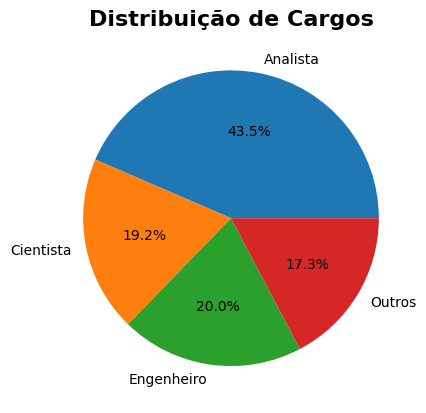

In [6]:
cubo = df[df['cargo2']!='Não informado'].groupby('cargo2').agg({'cargo':'count'}).reset_index()
ax = cubo.plot.pie(y='cargo', labels=cubo['cargo2'], autopct='%1.1f%%', legend=False)

ax.set_title("Distribuição de Cargos", fontsize=16, weight = 'bold')
ax.spines[['right', 'top', 'bottom']].set_visible(False)
ax.set(ylabel=None)
ax.set_xticks([], [])

É possível notar que a maior parcela dos respondentes são Analistas, e o percentual de Cientistas e Engenheiros são bem próximos.

Os demais não se encaixaram na nossa definição e foram classificados como Outros

### Faixa Salarial por Cargo (Pandas plot)

[]

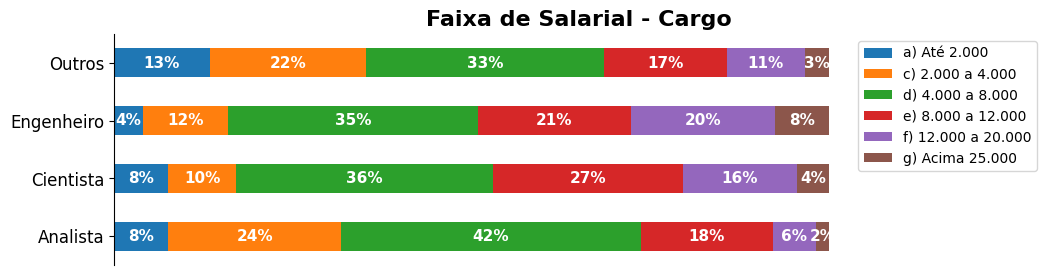

In [7]:
matriz_agregacao = df[df['cargo2']!='Não informado']

matriz_agregacao = matriz_agregacao.groupby(['cargo2', 'fx_salarial2'])['cargo2'].count().unstack().fillna(0)
matriz_agregacao = matriz_agregacao.apply(lambda x: x/x.sum(), axis=1) * 100
matriz_agregacao = matriz_agregacao.astype(float)

ax = matriz_agregacao.plot(kind = 'barh', stacked=True, figsize=(12,3), fontsize =12, xlim=[0,130], )

for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt = '%.0f%%', weight = 'bold', color = 'white', fontsize =11)

ax.legend(loc='upper right')
ax.set_title("Faixa de Salarial - Cargo", fontsize=16, weight = 'bold')
ax.spines[['right', 'top', 'bottom']].set_visible(False)
ax.set(ylabel=None)
ax.set_xticks([], [])


Concentração de Analistas e Outros cargos em menores faixas de rendas quando comparados com Cientistas e Engenheiros

### Distribuição de idade por Cargo (Seaborn)

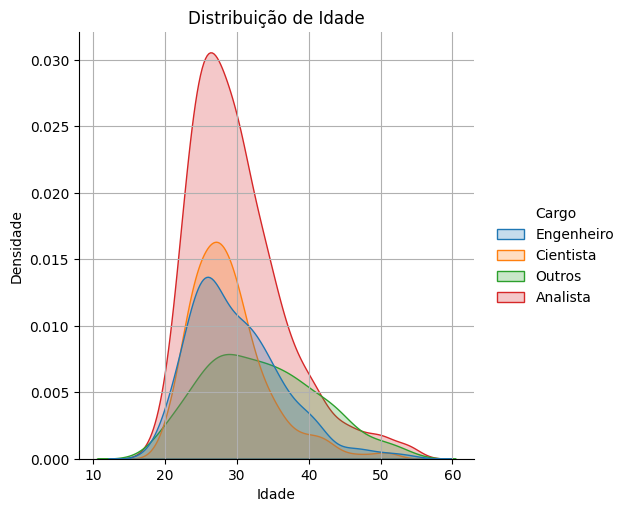

In [8]:
df_idade = df[(df['Idade']>15)&(df['cargo2']!='Não informado')][['cargo2', 'Idade']]
df_idade = df_idade.rename(columns={"Idade": "idade", "cargo2": "Cargo"})

ax = sns.displot(df_idade, x="idade", hue="Cargo", kind="kde", fill=True)

# Adicionando título e rótulos dos eixos x e y
plt.title("Distribuição de Idade")
plt.xlabel("Idade")
plt.ylabel("Densidade")

# Adicionando grade
plt.grid(True)

# Mostrando o gráfico
plt.show()

A idade dos funcionários segue uma distribuição normal para todos os cargos, com tendência à esquerda, exceto para outros cargos

### Distribuição acumulada de idade por Cargo (Seaborn)

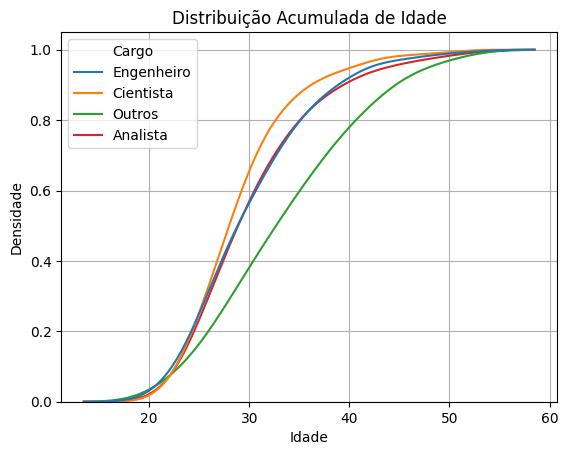

In [9]:
sns.kdeplot(
    data=df_idade, x="idade", hue="Cargo",
    cumulative=True, common_norm=False, common_grid=True,
)

# Adicionando título e rótulos dos eixos x e y
plt.title("Distribuição Acumulada de Idade")
plt.xlabel("Idade")
plt.ylabel("Densidade")

# Adicionando grade
plt.grid(True)

# Mostrando o gráfico
plt.show()

A distribuição de idade dos engenheiros e analistas é igual, enquanto a dos cientistas de dados tem maior concentração em idades menores e a dos outros cargos tem uma concentração maior em idades mais altas.

### Regime de Trabalho por Cargo (Matplotlib)

In [10]:
df_regime = df_filtrado[["regime_trabalho", 'cargo2']]

df_regime_agrupado = df_regime.groupby(["regime_trabalho", "cargo2"]).size().reset_index()
df_regime_agrupado = df_regime_agrupado.rename(columns={'cargo2': 'cargo'})
df_regime_agrupado.columns.values[2] = 'qtd'
df_regime_agrupado.set_index('cargo', inplace=True)


df_regime_agrupado = df_regime_agrupado.groupby(["cargo", "regime_trabalho"])["qtd"].sum().unstack()
df_regime_agrupado

cargos = df_regime_agrupado.index.to_list()
presencial = df_regime_agrupado["Modelo 100% presencial"]
remoto = df_regime_agrupado["Modelo 100% remoto"]
hibrido_fixo = df_regime_agrupado["Modelo híbrido com dias fixos de trabalho presencial"]
hibrido_flexivel = df_regime_agrupado["Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)"]

x = np.arange(len(cargos)) # localização dos labels para o eixo-x
width = 0.4

# fig, ax = plt.subplots(1,1, figsize = (15,8))
# colors = ['#e6ccff', '#b566ff', '#8400ff', '#4f0099']
# rects1 = ax.bar(x -width, presencial, width/2, label = '100% presencial', color = colors[0])
# rects2 = ax.bar(x - width/2, remoto, width/2, label = '100% remoto', color = colors[1])
# rects3 = ax.bar(x , hibrido_fixo, width/2, label = 'Híbrido fixo', color = colors[2])
# rects4 = ax.bar(x + width/2, hibrido_flexivel, width/2, label = 'Híbrido flexível', color = colors[3])

# # Adicionado informações aos eixos
# ax.set_ylabel('Quantidade')
# ax.set_title('Regime de trabalho agrupado por cargos')
# ax.set_xticks(x, cargos)
# ax.legend()

# # Adicionando os labels às barras
# ax.bar_label(rects1, padding = 3)
# ax.bar_label(rects2, padding = 3)
# ax.bar_label(rects3, padding = 3)
# ax.bar_label(rects4, padding = 3)


# # plt.tight_layout()
# plt.show()

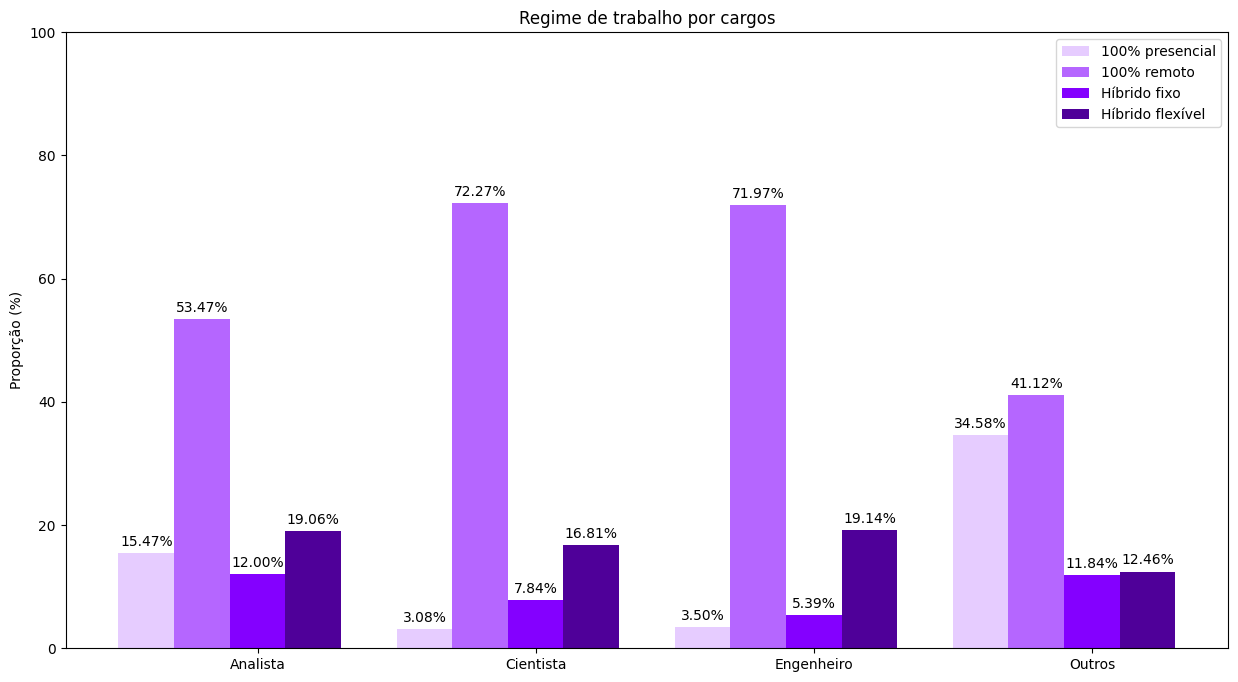

In [11]:
cargos = df_regime_agrupado.index.to_list()
total = df_regime_agrupado.sum(axis=1) # soma das quantidades para cada cargo
presencial_prop = df_regime_agrupado["Modelo 100% presencial"] / total # proporção de funcionários em regime 100% presencial
remoto_prop = df_regime_agrupado["Modelo 100% remoto"] / total # proporção de funcionários em regime 100% remoto
hibrido_fixo_prop = df_regime_agrupado["Modelo híbrido com dias fixos de trabalho presencial"] / total # proporção de funcionários em regime híbrido fixo
hibrido_flexivel_prop = df_regime_agrupado["Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)"] / total # proporção de funcionários em regime híbrido flexível

x = np.arange(len(cargos)) # localização dos labels para o eixo-x
width = 0.4

fig, ax = plt.subplots(1,1, figsize = (15,8))
colors = ['#e6ccff', '#b566ff', '#8400ff', '#4f0099']
rects1 = ax.bar(x -width, presencial_prop, width/2, label = '100% presencial', color = colors[0])
rects2 = ax.bar(x - width/2, remoto_prop, width/2, label = '100% remoto', color = colors[1])
rects3 = ax.bar(x , hibrido_fixo_prop, width/2, label = 'Híbrido fixo', color = colors[2])
rects4 = ax.bar(x + width/2, hibrido_flexivel_prop, width/2, label = 'Híbrido flexível', color = colors[3])

# Adicionado informações aos eixos
ax.set_ylabel('Proporção (%)')
ax.set_ylim([0, 1]) # definindo os limites do eixo y
ax.set_yticklabels(['0', '20', '40', '60', '80', '100'])
ax.set_title('Regime de trabalho por cargos')
ax.set_xticks(x, cargos)
ax.legend()


# Adicionando os labels às barras
ax.bar_label(rects1, padding = 3, labels = [f"{val*100:.2f}%" for val in presencial_prop])
ax.bar_label(rects2, padding = 3, labels = [f"{val*100:.2f}%" for val in remoto_prop])
ax.bar_label(rects3, padding = 3, labels = [f"{val*100:.2f}%" for val in hibrido_fixo_prop])
ax.bar_label(rects4, padding = 3, labels = [f"{val*100:.2f}%" for val in hibrido_flexivel_prop])

plt.show()

Pode-se notar que a grande maioria do regime de trabalho é 100% remoto. Com exceção dos outros onde o regime 100% presencial é bem próximo do regime 100% remoto. Dentre os três principais funções, o de analista é o que possiu uma menor proporção de cargos 100% remoto. 

Enquanto os cargos de Cientista e Engenheiro possuem uma distribuição parecida, com a grande maioria 100% remota, seguida de remota flexível.

### Tipo de dados utilizados no ambiente de trabalho por Cargo (Matplotlib)

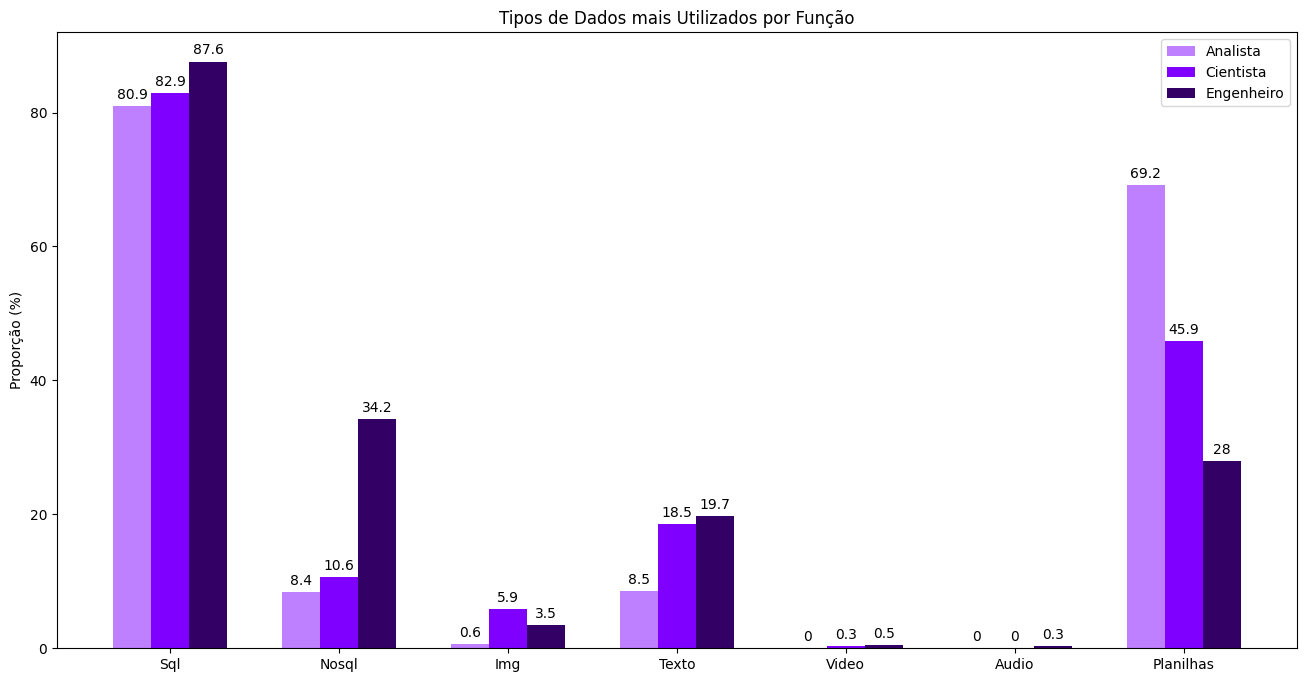

In [12]:
cols = ['cargo2','dados_sql','dados_nosql','dados_img','dados_texto','dados_video',
        'dados_audio','dados_planilhas']

dados_agr = round((df.loc[df['cargo2'].isin(['Analista','Cientista','Engenheiro'])][cols].groupby('cargo2').mean().transpose())*100,1)
dados_agr = dados_agr.reset_index()
dados_agr['index'] = dados_agr['index'].str.slice(start=6).str.capitalize()

dados = dados_agr["index"].to_list()
cientista = dados_agr["Cientista"]
engenheiro = dados_agr["Engenheiro"]
analista = dados_agr["Analista"]

x = np.arange(len(dados)) # localização dos labels para o eixo-x
width = 0.45

fig, ax = plt.subplots(1,1, figsize = (16,8))
colors = ['#bf80ff', '#8000ff', '#330066', '#4f0099']
rects1 = ax.bar(x -width/2, analista, width/2, label = 'Analista', color = colors[0])
rects2 = ax.bar(x , cientista, width/2, label = 'Cientista', color = colors[1])
rects3 = ax.bar(x + width/2 , engenheiro, width/2, label = 'Engenheiro', color = colors[2])


# Adicionado informações aos eixos
ax.set_ylabel('Proporção (%)')
ax.set_title('Tipos de Dados mais Utilizados por Função')
ax.set_xticks(x, dados)
ax.legend()

# Adicionando os labels às barras
ax.bar_label(rects1, padding = 3)
ax.bar_label(rects2, padding = 3)
ax.bar_label(rects3, padding = 3)

# plt.tight_layout()
plt.show()

Pode-se notar que o SQL é o tipo de dado mais utilizado pelos profissionias na área. Em sequêcia vem as planilhas, principalmente pelo Analistas que utilizam o Excel para abastecer sua base de dados. Em sequencia o NoSQL, destaque para os Engenheiros de Dados, que devido a maior quantidade de dados (Big Data), preferem esse tipo de dado. As imagens, video e audio possuem uma proporção bastante reduzida de utilidade, uma vez que suas aplicações tendem a ser mais especificas e trabalhosas.

**Os gráficos em plotly não aparecem no github - rodar local**

### Linguagem utilizada no ambiente de trabalho por Cargo (Plotly)


In [13]:
cols = ['cargo2','ling_sql','ling_r','ling_python','ling_c','ling_net',
        'ling_java','ling_julia','ling_sas','ling_vba','ling_scala','ling_matlab',
        'ling_php','ling_javascript','ling_nenhuma']

linguagens = round((df.loc[df['cargo2'].isin(['Analista','Cientista','Engenheiro'])][cols].groupby('cargo2').mean().transpose())*100,1)
linguagens = linguagens.reset_index()
linguagens['index'] = linguagens['index'].str.slice(start=5).str.capitalize()
# linguagens

fig = go.Figure(data = [
    go.Bar(name='Analista', x = linguagens['index'], y = linguagens['Analista'], marker_color = '#bf80ff'),
    go.Bar(name='Cientista', x = linguagens['index'], y = linguagens['Cientista'], marker_color = '#8000ff'),
    go.Bar(name='Engenheiro', x = linguagens['index'], y = linguagens['Engenheiro'], marker_color = '#330066')
])

fig.update_layout(template = 'simple_white', autosize=True, barmode='group')
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)', title_text = 'Linguagem mais utilizada por função' , title_x = 0.5)
fig['layout']['yaxis']['title']='Proporção (%)'

fig.show()

Em relação as linguagens, a frequência também faz sentido com o esperado considerando que a pesquisa é relacionado à profissionais de Data, priorizando a tríade SQL/Python/R, e uma outra categoria que se destaca é a **Nenhuma** que provavelmente são as análises em Excel que os Analistas realizam

Analistas utilizam mais SQL seguido de Python > Nenhuma > R e os Cientistas de Dados mais seguem mais focados no Python com baixo uso de SQL e R

Como R é uma linguagem de programação muito voltada para análise de dados/modelagem observamos uma frequência reduzida quando consideramos os Engenheiros que se utiliza basicamente Python e SQL

### Comparação de faixa salárial por gênero (Plotly)

In [14]:
generos_declarado = (df['genero'].isin(['Masculino','Feminino']))
salario_declarado = (df['fx_salarial2'] != 'z) Não informado')
df_aux = df.loc[generos_declarado & salario_declarado]
salario_genero = round(pd.crosstab(df_aux['genero'], df_aux['fx_salarial2'], normalize='index')*100, 1)
salario_genero = salario_genero.reset_index()
salario_genero = pd.melt(salario_genero, id_vars='genero', var_name='fx_salarial2', value_name='Prop')
salario_genero.columns = ['Genero', 'Faixa Salarial', 'Proporcao']

fig = px.line(salario_genero,
              template = 'simple_white',
              x = 'Faixa Salarial',
              y = 'Proporcao',
              color = 'Genero',
              markers = True,
              color_discrete_sequence = ['#d9b3ff', '#7300e6'],
              labels={'Genero':'Gênero'})
fig.update_layout(autosize = True,plot_bgcolor='rgba(0,0,0,0)', title_text = 'Distribuição de faixa salarial por gênero' , title_x = 0.5)

fig['layout']['yaxis']['title']='Proporção (%)'

# df_aux.groupby('genero').size()
# Feminino      436
# Masculino    1924
# dtype: int64

fig.show()

Com o gráfico que compara a faixa salárial podemos ver que conforme é de se esperar o maior volume percentual se encontra nas faixas intermediarias, com baixas concentrações para ambos os gêneros nas faixas extremas.

Um comportamento que também é possível observar é a inversão da diferença entre gêneros a partir da faixa salarial de R$12mil, onde os respondentes de gênero Masculino passam a ser em maior nível de proporção do que os de gênero Feminino. 
Sendo a maior diferença **(6.3%)** entre os gêneros acontecendo na faixa **f) 12.000 a 20.000**